<a href="https://colab.research.google.com/github/Truomghoccode/Bai-Tap-Phenikaa/blob/main/Online_Retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [4]:
online_rt = pd.read_csv('https://raw.githubusercontent.com/thieu1995/csv-files/main/data/pandas/Online_Retail.csv',encoding='latin1')

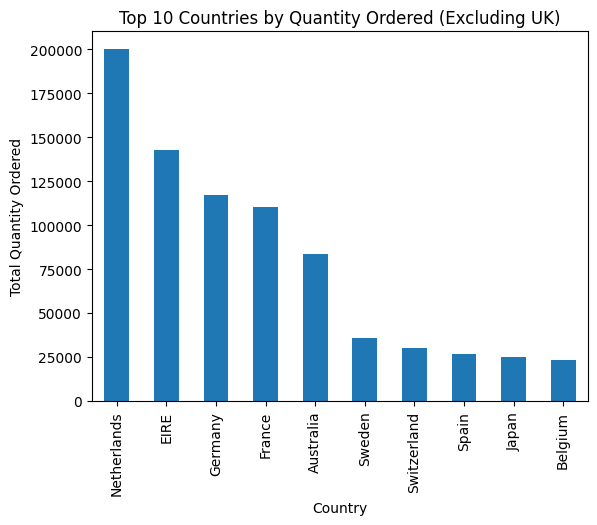

In [5]:
top_countries = online_rt[online_rt['Country'] != 'United Kingdom'].groupby('Country')['Quantity'].sum().sort_values(ascending=False).head(10)

top_countries.plot(kind='bar')
plt.title('Top 10 Countries by Quantity Ordered (Excluding UK)')
plt.xlabel('Country')
plt.ylabel('Total Quantity Ordered')
plt.show()

In [6]:
online_rt = online_rt[online_rt['Quantity'] > 0]

<ipython-input-8-b262ae1bc41d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['QuantityPerUnitPrice'] = data['Quantity'] / data['UnitPrice']


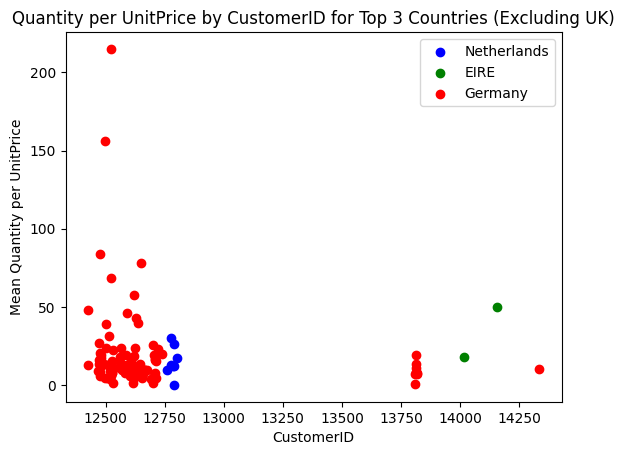

In [8]:
top_countries = online_rt[online_rt['Country'] != 'United Kingdom'].groupby('Country')['Quantity'].sum().sort_values(ascending=False).head(3).index
data = online_rt[online_rt['Country'].isin(top_countries)]
data['QuantityPerUnitPrice'] = data['Quantity'] / data['UnitPrice']
data = data.groupby(['Country', 'CustomerID'])['QuantityPerUnitPrice'].mean().reset_index()
colors = ['b', 'g', 'r']
for i, country in enumerate(top_countries):
    country_data = data[data['Country'] == country]
    plt.scatter(country_data['CustomerID'], country_data['QuantityPerUnitPrice'], c=colors[i], label=country)

plt.title('Quantity per UnitPrice by CustomerID for Top 3 Countries (Excluding UK)')
plt.xlabel('CustomerID')
plt.ylabel('Mean Quantity per UnitPrice')
plt.legend()
plt.show()

In [11]:
data['QuantityPerUnitPrice'].head()

0    17.850532
1    49.977028
2          NaN
3    12.775408
4    48.139145
Name: QuantityPerUnitPrice, dtype: float64

In [12]:
online_rt['UnitPrice'].dtype

dtype('float64')

In [16]:
customer_data = online_rt[online_rt['CustomerID'].isin([12346.0, 12347.0])]
customer_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
14938,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,12/7/10 14:57,2.10,12347.0,Iceland
14939,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,12/7/10 14:57,4.25,12347.0,Iceland
14940,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,12/7/10 14:57,3.25,12347.0,Iceland
14941,537626,22492,MINI PAINT SET VINTAGE,36,12/7/10 14:57,0.65,12347.0,Iceland
14942,537626,22771,CLEAR DRAWER KNOB ACRYLIC EDWARDIAN,12,12/7/10 14:57,1.25,12347.0,Iceland


In [20]:
online_rt['Sales'] = online_rt['Quantity'] * online_rt['UnitPrice']
top_countries = online_rt.groupby('Country')['Sales'].sum().sort_values(ascending=False)
top_countries.head(3)

Country
United Kingdom    9003097.964
Netherlands        285446.340
EIRE               283453.960
Name: Sales, dtype: float64

In [21]:
grouped = online_rt.groupby(['CustomerID', 'Country'])['UnitPrice'].mean().reset_index(name='AvgPrice')

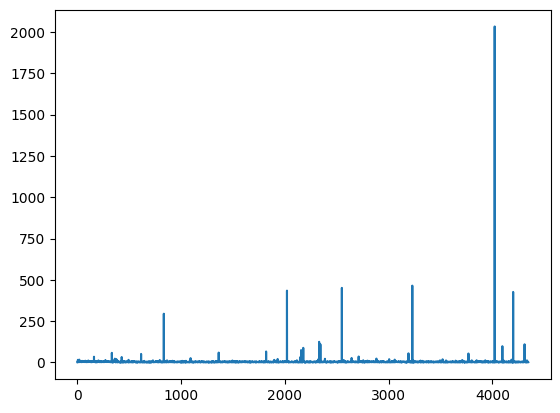

In [26]:
x =online_rt.groupby(['CustomerID', 'Country'])['UnitPrice'].mean().reset_index(name='AvgPrice')
plt.plot(x['AvgPrice'])
plt.show()

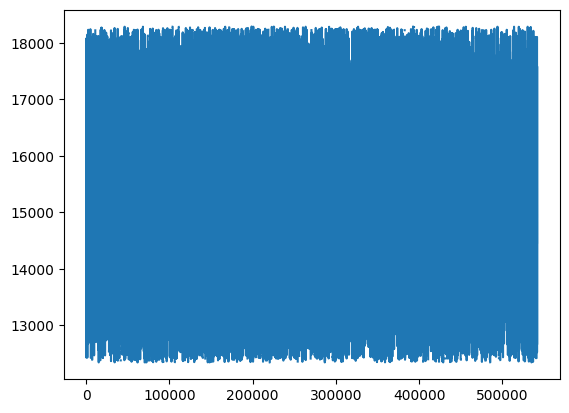

In [35]:
x = online_rt['CustomerID']
plt.plot(x)
plt.show()

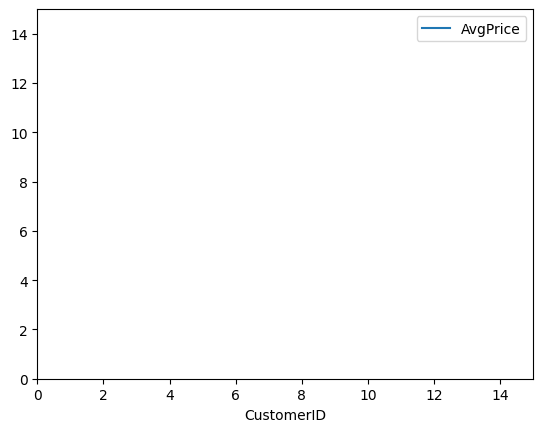

In [37]:
x = online_rt.groupby(['CustomerID', 'Country'])['UnitPrice'].mean().reset_index(name='AvgPrice')
ax = x.plot(x='CustomerID', y='AvgPrice', kind='line')
ax.set_xlim([0, 15]) # set the limits of the x-axis
ax.set_ylim([0, 15]) # set the limits of the y-axis
plt.show()

In [41]:
online_rt['PriceRange'] = pd.cut(online_rt['UnitPrice'], bins=range(0, 51, 1))
online_rt['Revenue'] = online_rt['Quantity'] * online_rt['UnitPrice']
grouped = online_rt.groupby('PriceRange').agg({'Quantity': 'sum', 'Revenue': 'sum'}).reset_index()


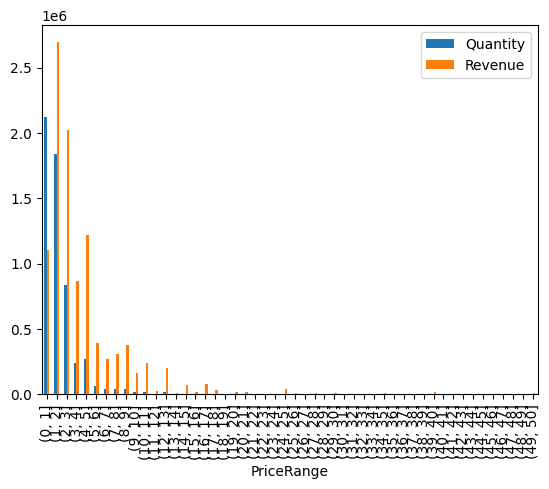

In [40]:
online_rt['PriceRange'] = pd.cut(online_rt['UnitPrice'], bins=range(0, 51, 1))
online_rt['Revenue'] = online_rt['Quantity'] * online_rt['UnitPrice']
grouped = online_rt.groupby('PriceRange').agg({'Quantity': 'sum', 'Revenue': 'sum'}).reset_index()

grouped.plot(x='PriceRange', y=['Quantity', 'Revenue'], kind='bar')
plt.show()

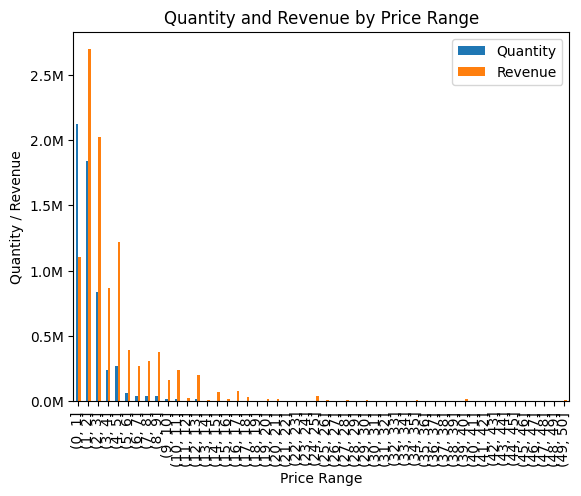

In [44]:
online_rt['Revenue'] = online_rt['Quantity'] * online_rt['UnitPrice']
online_rt['PriceRange'] = pd.cut(online_rt['UnitPrice'], bins=range(0, 51, 1))
grouped = online_rt.groupby('PriceRange').agg({'Quantity': 'sum', 'Revenue': 'sum'}).reset_index()

ax = grouped.plot(x='PriceRange', y=['Quantity', 'Revenue'], kind='bar')
ax.set_xticklabels(grouped['PriceRange'])
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M'))
ax.set_title('Quantity and Revenue by Price Range')
ax.set_xlabel('Price Range')
ax.set_ylabel('Quantity / Revenue')
plt.show()